In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [5]:
#Carga de CSVs
train_df = pd.read_csv("../Preprocesamiento/train_preproc.csv",sep=',',encoding='UTF-8')

In [13]:
X = train_df.loc[:,['Warehouse_block','Mode_of_Shipment','Customer_care_calls','Cost_of_the_Product','Prior_purchases','Product_importance','Discount_offered','Weight_in_gms']]
Y = train_df['Reached.on.Time_Y.N'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42) 

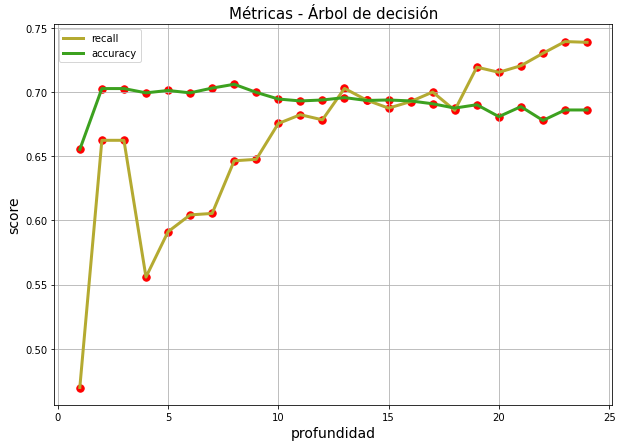

El mayor recall es de:  0.7391799544419134 
Con un nivel de profundidad de: 22

La mayor precisión es de:  0.705925925925926 
Con un nivel de profundidad de: 7


In [14]:
#Creamos el registro de scores para el árbol de decision
profundidad = []
recall_ = []
accura_ = []
for i in range(1,25):
    #print()
    clf = DecisionTreeClassifier(max_depth = i, random_state = 42)
    # Entrenamos
    clf.fit(X_train,y_train)
    # Predecimos
    y_pred = clf.predict(X_test)
    # Evaluamos
    score = recall_score(y_test,y_pred)
    recall_.append(score)
    score = accuracy_score(y_test,y_pred)
    accura_.append(score)
    profundidad.append(i)

#Graficamos
plt.figure(figsize=(10,7))
plt.title('Métricas - Árbol de decisión', fontsize=15)

plt.plot(profundidad,recall_, lw=3,label='recall',c='#B4AA31')
plt.scatter(profundidad, recall_,s=55,c='r')



plt.scatter(profundidad, accura_,s=55,c='r')
plt.plot(profundidad,accura_, lw=3,label='accuracy',c='#3CA11F')

plt.ylabel('score',fontsize=14)
plt.xlabel('profundidad',fontsize=14)
plt.legend()
plt.grid()
plt.show()

prof_max_recall = 0
prof_max_accur = 0
for i in range(1,len(profundidad)): 
    if recall_[i] ==  np.asarray(recall_).max():
        prof_max_recall = i
    if accura_[i] == np.asarray(accura_).max():
        prof_max_accur = i

print("El mayor recall es de: ", np.asarray(recall_).max(),'\nCon un nivel de profundidad de:', prof_max_recall)
print("\nLa mayor precisión es de: ", np.asarray(accura_).max(),'\nCon un nivel de profundidad de:', prof_max_accur)

In [15]:
# Hyperparameter search space
search_space = {
    'max_depth': np.arange(1,25)
}

In [16]:
# Probamos la estrategia grid search
from sklearn.model_selection import GridSearchCV #cv: cross validation

# Le pasamos la grilla que creamos
model = GridSearchCV(clf, param_grid=search_space, cv=4)

# Entrenamos
model.fit(X_train,y_train)

print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores hiperparámetros: {'max_depth': 5}
Mejor Score: 0.7148764647748129

